In [1]:
from packaging import version
import sklearn

In [2]:
import numpy as np

In [3]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [9]:
from matplotlib import pyplot as plt

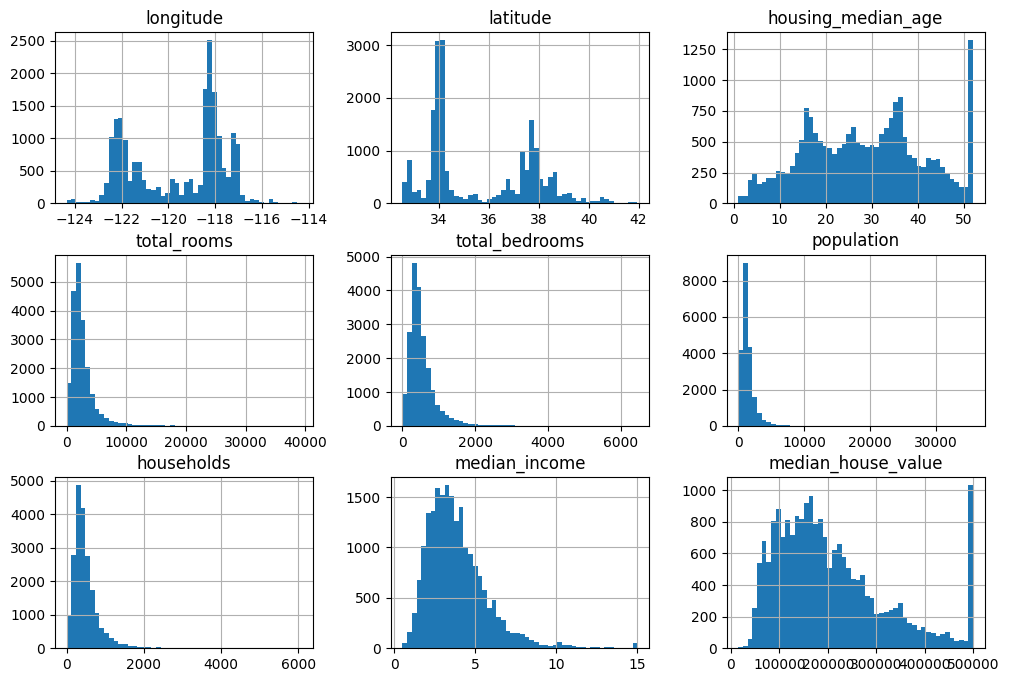

In [10]:
housing.hist(bins=50, figsize=(12, 8))
plt.show()

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

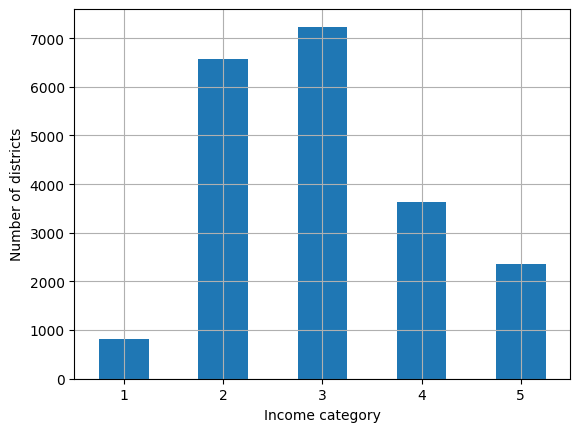

In [13]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing['income_cat']):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [15]:
strat_train_set, strat_test_set = strat_splits[0]

In [16]:
pd.DataFrame(
    [strat_splits[i][0]['income_cat'].value_counts() / len(strat_splits[i][0]) for i in range(len(strat_splits))]
)

income_cat,3,2,4,5,1
count,0.350594,0.318859,0.176296,0.114462,0.039789
count,0.350594,0.318859,0.176296,0.114462,0.039789
count,0.350594,0.318859,0.176296,0.114462,0.039789
count,0.350594,0.318859,0.176296,0.114462,0.039789
count,0.350594,0.318859,0.176296,0.114462,0.039789
count,0.350594,0.318859,0.176296,0.114462,0.039789
count,0.350594,0.318859,0.176296,0.114462,0.039789
count,0.350594,0.318859,0.176296,0.114462,0.039789
count,0.350594,0.318859,0.176296,0.114462,0.039789
count,0.350594,0.318859,0.176296,0.114462,0.039789


In [17]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [18]:
# extra code – computes the data for Figure 2–10

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


In [19]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Visualizing

In [20]:
housing = strat_train_set.copy()

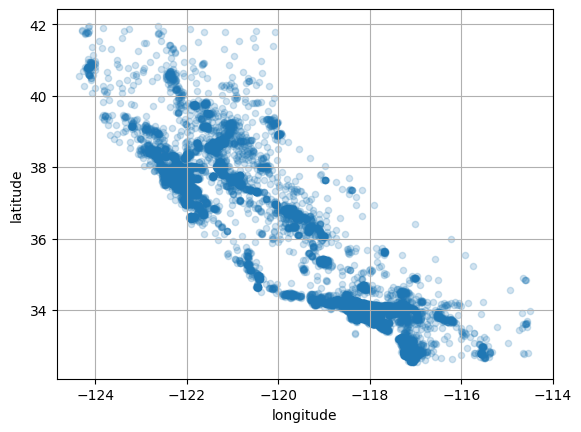

In [21]:
housing.plot(kind='scatter', x='longitude', y='latitude', grid=True, alpha=.2)
plt.show()

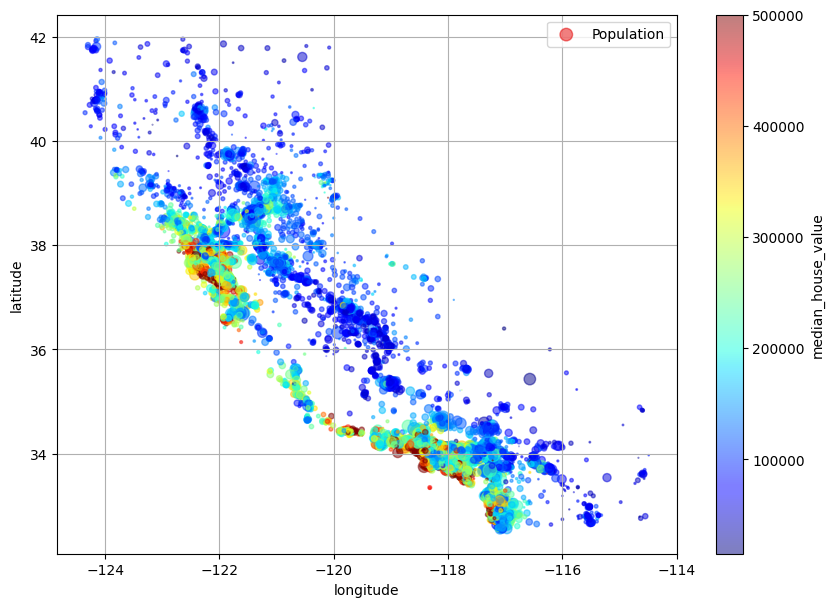

In [22]:
housing.plot(
    kind='scatter', x='longitude', y='latitude', grid=True,
    s=housing['population']/100, label='Population',
    c='median_house_value', cmap='jet', colorbar=True,
    legend=True, sharex=False, figsize=(10,7), alpha=.5
)
plt.show()

# Correlations

In [23]:
corr_matrix = housing.corr(numeric_only=True)

In [24]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


In [25]:
corr_matrix['median_house_value']

longitude            -0.050859
latitude             -0.139584
housing_median_age    0.102175
total_rooms           0.137455
total_bedrooms        0.054635
population           -0.020153
households            0.071426
median_income         0.688380
median_house_value    1.000000
Name: median_house_value, dtype: float64

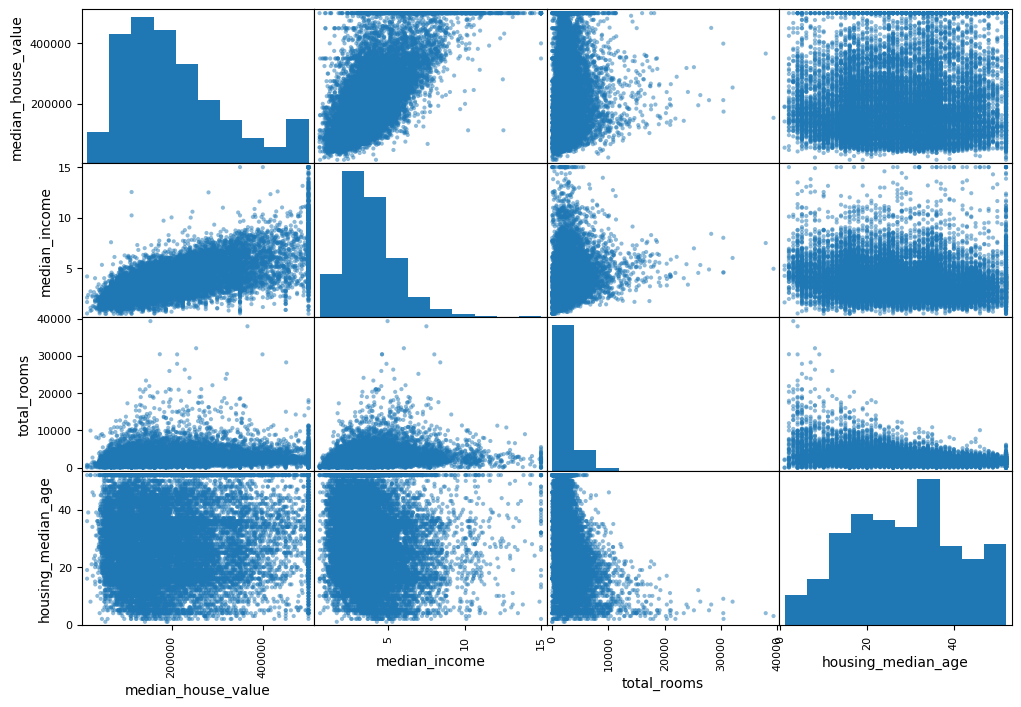

In [26]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

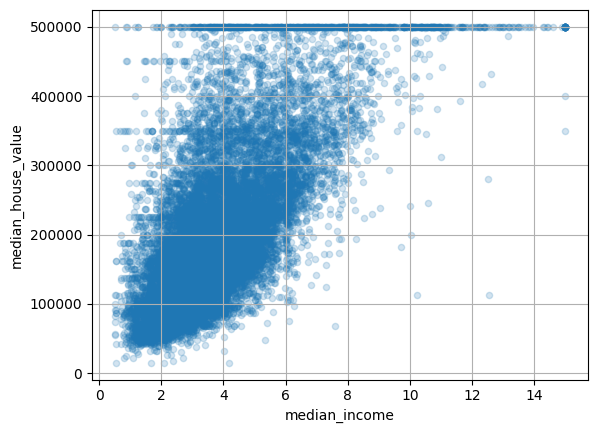

In [27]:
housing.plot(kind='scatter', y='median_house_value', x='median_income', alpha=.2, grid=True)

In [28]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

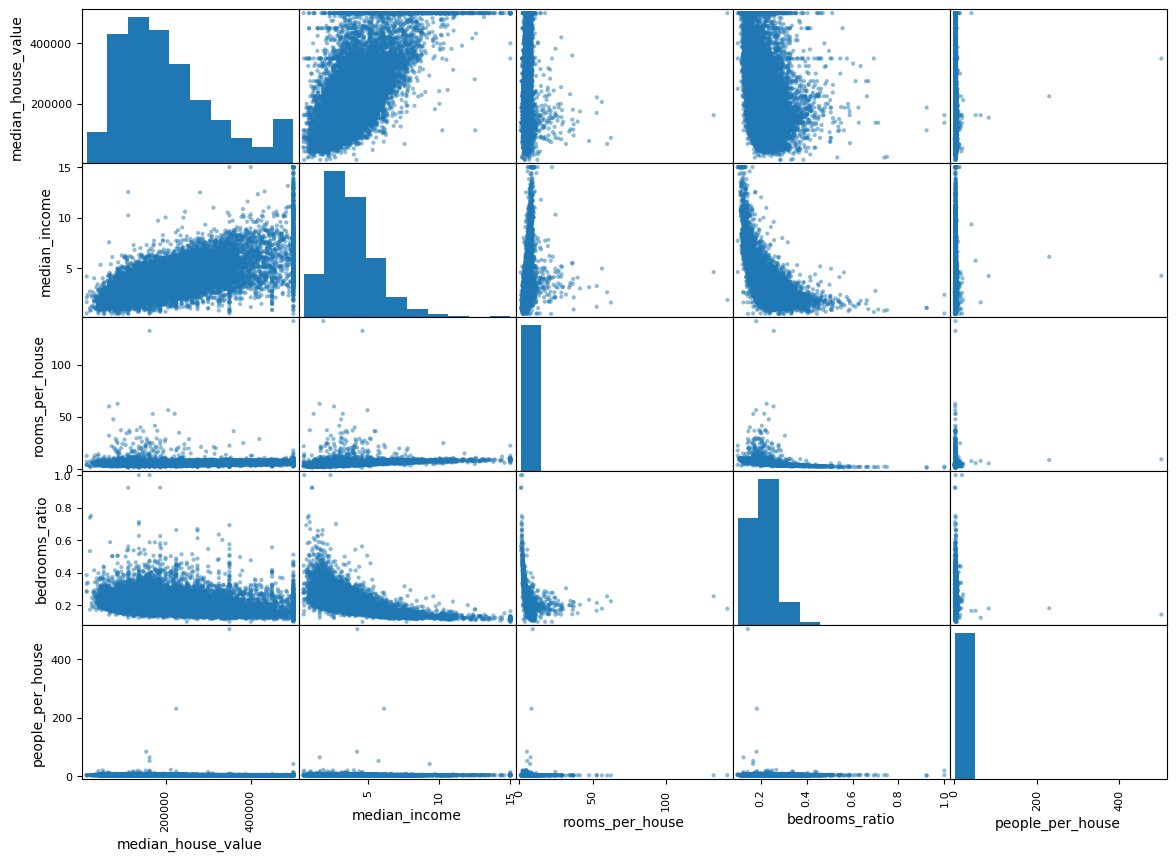

In [29]:
attributes = ["median_house_value", "median_income", "rooms_per_house", "bedrooms_ratio", "people_per_house"]

scatter_matrix(housing[attributes], figsize=(14, 10))
plt.show()

In [30]:
housing.corr(numeric_only=True)['median_house_value']

longitude            -0.050859
latitude             -0.139584
housing_median_age    0.102175
total_rooms           0.137455
total_bedrooms        0.054635
population           -0.020153
households            0.071426
median_income         0.688380
median_house_value    1.000000
rooms_per_house       0.143663
bedrooms_ratio       -0.256397
people_per_house     -0.038224
Name: median_house_value, dtype: float64

# Cleaning Data

In [31]:
housing = strat_train_set.drop(columns='median_house_value')
housing_labels = strat_train_set["median_house_value"].copy()

In [35]:
from sklearn.impute import SimpleImputer

In [36]:
imputer = SimpleImputer(strategy='median')

In [37]:
housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [38]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [39]:
X = imputer.transform(housing_num)

In [40]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [41]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [42]:
housing_cat = housing[['ocean_proximity']]
housing_cat.value_counts(dropna=False)

ocean_proximity
<1H OCEAN          7274
INLAND             5301
NEAR OCEAN         2089
NEAR BAY           1846
ISLAND                2
Name: count, dtype: int64

In [43]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [44]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [45]:
one_hot_encoder = OneHotEncoder()
housing_cat_1hot = one_hot_encoder.fit_transform(housing_cat)

In [46]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [47]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [48]:
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [49]:
standard_scaler = StandardScaler()
housing_num_standard_scaled = standard_scaler.fit_transform(housing_num)

In [50]:
housing_num_standard_scaled

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.13746004,
         1.39481249, -0.93649149],
       [ 0.59639445, -0.702103  ,  0.90762971, ..., -0.69377062,
        -0.37348471,  1.17194198],
       [-1.2030985 ,  1.27611874,  0.35142777, ..., -0.78876841,
        -0.77572662, -0.75978881],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  1.26829911,
         0.67913534,  0.1010487 ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.27356264,
         0.88286825,  0.14539615],
       [-1.41803793,  0.94797769,  1.22545939, ..., -0.67915557,
        -0.75221898, -0.31034135]])

In [51]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[['housing_median_age']], [[35]], gamma=.1)

In [52]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing['population'])
inv_log_pop = log_transformer.inverse_func(log_pop)

pd.DataFrame({
    'population': housing['population'],
    'log_pop': log_pop,
    'inv_log_pop': inv_log_pop
})

,population,log_pop,inv_log_pop
13096,1576.0,7.362645,1576.0
14973,666.0,6.501290,666.0
3785,562.0,6.331502,562.0
14689,1845.0,7.520235,1845.0
20507,1912.0,7.555905,1912.0
...,...,...,...
14207,938.0,6.843750,938.0
13105,1419.0,7.257708,1419.0
19301,2814.0,7.942362,2814.0
19121,1725.0,7.452982,1725.0


In [53]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[['latitude', 'longitude']])

In [54]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [55]:
housing_labels = strat_train_set["median_house_value"].copy()

In [61]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
                                           sample_weight=housing_labels)

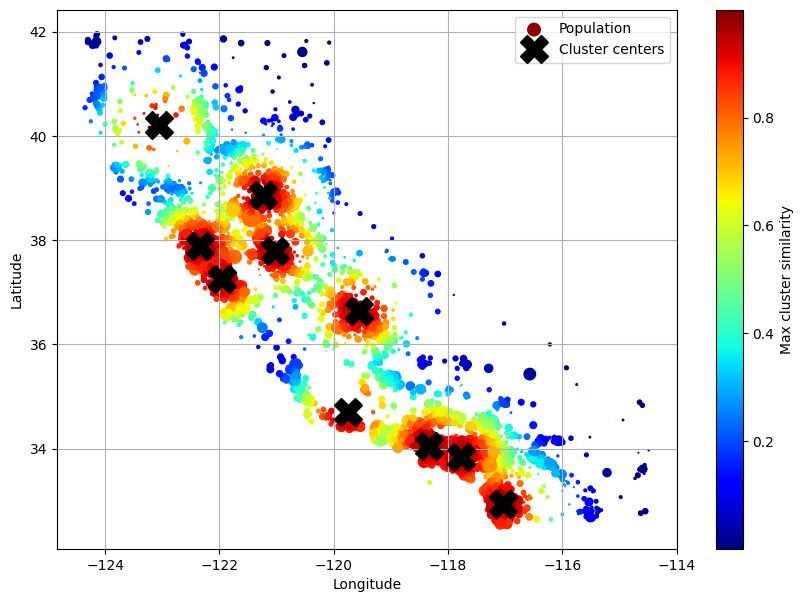

In [62]:
# extra code – this cell generates Figure 2–19

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
plt.show()

## Transformation Pipelines

In [63]:
from sklearn.pipeline import Pipeline, make_pipeline

run_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler())
])

In [64]:
num_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())

In [65]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2, :5]

array([[-1.42303652,  1.0136059 ,  1.86111875,  0.31191221,  1.36816703],
       [ 0.59639445, -0.702103  ,  0.90762971, -0.30861991, -0.43592476]])

In [66]:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared,
    columns=num_pipeline.get_feature_names_out()
)

In [67]:
df_housing_num_prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
1,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
2,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
3,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
4,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365


In [68]:
from sklearn.compose import ColumnTransformer, make_column_selector

In [69]:
num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

preprocessing = ColumnTransformer(
    [
        ('num', num_pipeline, num_attribs),
        ('cat', cat_pipeline, cat_attribs)
    ]
)

In [70]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ['ratio']

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy='median'),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler()
    )

log_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    FunctionTransformer(np.log, feature_names_out='one-to-one'),
    StandardScaler()
)

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [71]:
preprocessing = ColumnTransformer(
    [
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline
)

In [72]:
housing_prepared = preprocessing.fit_transform(housing)

In [73]:
housing_prepared.shape

(16512, 24)

In [74]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

# Model Selection and Training

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
housing_labels.shape, housing.shape

((16512,), (16512, 9))

In [77]:
strat_train_set.shape

(16512, 10)

In [78]:
strat_train_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [82]:
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E27BE9BB90>)])),
                ('linearregression', LinearRegression())])

In [83]:
lin_reg.predict(housing)[:5]

array([242761.81285712, 375862.7850295 , 127480.98273406,  99355.30257635,
       324610.74224191])

In [86]:
predictions = lin_reg.predict(strat_train_set.drop(columns='median_house_value'))
actuals = strat_train_set['median_house_value']

for a, p in list(zip(actuals, predictions))[:10]:
    print(round(a, -2), round(p, -2))

458300.0 242800.0
483800.0 375900.0
101700.0 127500.0
96100.0 99400.0
361800.0 324600.0
92600.0 193000.0
349300.0 310600.0
440900.0 334600.0
160100.0 189700.0
183900.0 99000.0


In [87]:
from sklearn.metrics import root_mean_squared_error

In [88]:
lr_rmse = root_mean_squared_error(actuals, predictions)

In [89]:
lr_rmse

68647.95686706669

In [90]:
from sklearn.tree import DecisionTreeRegressor

In [91]:
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E27BE9BB90>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [93]:
preds = tree_reg.predict(housing)
tree_rmse = root_mean_squared_error(housing_labels, preds)

In [94]:
tree_rmse

0.0

In [95]:
from sklearn.model_selection import cross_val_score

In [97]:
kf_tree_rmse = cross_val_score(
    tree_reg, housing, housing_labels,
    scoring='neg_root_mean_squared_error', cv=10
)

In [100]:
kf_tree_rmse = -kf_tree_rmse

In [103]:
pd.Series(kf_tree_rmse).describe()

count       10.000000
mean     66366.983603
std       1976.844743
min      63557.655007
25%      65004.623899
50%      65886.897085
75%      68129.026040
max      69530.301101
dtype: float64

In [104]:
from sklearn.ensemble import RandomForestRegressor

In [105]:
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))

In [106]:
kf_forest_rmse = cross_val_score(
    forest_reg, housing, housing_labels,
    scoring='neg_root_mean_squared_error', cv=10
)

In [107]:
kf_forest_rmse = -kf_forest_rmse

In [109]:
pd.Series(kf_forest_rmse).describe()

count       10.000000
mean     46938.209246
std       1018.397196
min      45522.649195
25%      46291.334639
50%      47021.703303
75%      47321.521991
max      49140.832210
dtype: float64

In [110]:
from sklearn.model_selection import GridSearchCV

In [112]:
full_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('random_forest', RandomForestRegressor(random_state=42))
])

param_grid = [
    {
        'preprocessing__geo__n_clusters': [5, 8, 10],
        'random_forest__max_features': [4, 6, 8]
    },
    {
        'preprocessing__geo__n_clusters': [10, 15],
        'random_forest__max_features': [6, 8, 10]        
    }
]

grid_search = GridSearchCV(
    full_pipeline, param_grid, cv=3,
    scoring='neg_root_mean_squared_error'
)

grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001E27BE9BB90>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [116]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [120]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,16.649132,0.112686,0.300879,0.006450,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-43006.650208,-43683.244212,-44158.332131,-43616.075517,472.565014,1
13,21.713996,0.046370,0.309341,0.006347,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-43696.807883,-44011.195266,-44819.026722,-44175.676624,472.676329,2
7,15.870583,0.037556,0.308659,0.007305,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-43709.661050,-44132.827198,-45226.940308,-44356.476185,639.295570,3
9,15.824515,0.154691,0.303498,0.007074,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-43709.661050,-44132.827198,-45226.940308,-44356.476185,639.295570,3
6,11.270759,0.076485,0.298560,0.022353,10,4,"{'preprocessing__geo__n_clusters': 10, 'random...",-43797.854175,-44232.653866,-45100.371162,-44376.959735,541.452222,5
14,26.160210,0.017331,0.306662,0.008299,15,10,"{'preprocessing__geo__n_clusters': 15, 'random...",-44209.438092,-44557.860640,-45048.545214,-44605.281315,344.201231,6
3,10.914539,0.015645,0.308445,0.014051,8,4,"{'preprocessing__geo__n_clusters': 8, 'random_...",-44386.450165,-44489.854476,-45257.044394,-44711.116345,388.330777,7
4,15.513312,0.214404,0.303576,0.007375,8,6,"{'preprocessing__geo__n_clusters': 8, 'random_...",-44578.615017,-44712.638159,-45550.355967,-44947.203048,429.988863,8
8,20.635982,0.167084,0.298263,0.000301,10,8,"{'preprocessing__geo__n_clusters': 10, 'random...",-44498.988402,-44931.272495,-45616.019888,-45015.426928,459.892242,9
10,20.414903,0.161178,0.307175,0.006485,10,8,"{'preprocessing__geo__n_clusters': 10, 'random...",-44498.988402,-44931.272495,-45616.019888,-45015.426928,459.892242,9


In [121]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'preprocessing__geo__n_clusters': randint(low=3, high=50),
    'random_forest__max_features': randint(low=2, high=20)
}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42
)

In [122]:
rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E212CED150>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E202D68690>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [123]:
final_model = rnd_search.best_estimator_

In [125]:
feature_importances = final_model['random_forest'].feature_importances_

In [127]:
feature_importances.round(3)

array([0.064, 0.052, 0.047, 0.006, 0.007, 0.007, 0.006, 0.189, 0.01 ,
       0.01 , 0.016, 0.042, 0.01 , 0.004, 0.016, 0.012, 0.009, 0.005,
       0.018, 0.008, 0.005, 0.006, 0.012, 0.008, 0.007, 0.023, 0.023,
       0.006, 0.006, 0.014, 0.022, 0.007, 0.006, 0.008, 0.012, 0.007,
       0.009, 0.004, 0.011, 0.012, 0.015, 0.007, 0.011, 0.018, 0.007,
       0.009, 0.012, 0.013, 0.019, 0.017, 0.011, 0.014, 0.009, 0.003,
       0.076, 0.   , 0.001, 0.002, 0.01 ])

In [129]:
sorted(
    zip(
        feature_importances, final_model['preprocessing'].get_feature_names_out(),
        
    ), reverse=True
)

[(np.float64(0.18883049114642353), 'log__median_income'),
 (np.float64(0.0755069016595242), 'cat__ocean_proximity_INLAND'),
 (np.float64(0.06427087748676083), 'bedrooms__ratio'),
 (np.float64(0.05216955099698511), 'rooms_per_house__ratio'),
 (np.float64(0.046642586962406155), 'people_per_house__ratio'),
 (np.float64(0.04244311259449022), 'geo__Cluster 3 similarity'),
 (np.float64(0.023291063179546732), 'geo__Cluster 17 similarity'),
 (np.float64(0.022649484211911698), 'geo__Cluster 18 similarity'),
 (np.float64(0.021972435766805798), 'geo__Cluster 22 similarity'),
 (np.float64(0.01881537204558838), 'geo__Cluster 40 similarity'),
 (np.float64(0.017669986767360032), 'geo__Cluster 10 similarity'),
 (np.float64(0.017546949538486258), 'geo__Cluster 35 similarity'),
 (np.float64(0.01727490371775081), 'geo__Cluster 41 similarity'),
 (np.float64(0.016055663107420102), 'geo__Cluster 6 similarity'),
 (np.float64(0.015811758952117748), 'geo__Cluster 2 similarity'),
 (np.float64(0.0147775594046303

In [130]:
X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

In [131]:
final_predictions = final_model.predict(X_test)

In [132]:
final_rmse = root_mean_squared_error(y_test, final_predictions)
print(final_rmse)

41556.053474456494


In [133]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(
    confidence, len(squared_errors) - 1,
    loc=squared_errors.mean(), scale=stats.sem(squared_errors)
))

array([39415.11928419, 43591.96637635])

In [134]:
import joblib

joblib.dump(final_model, 'my_california_housing_model.pkl')

['my_california_housing_model.pkl']